In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pylab import rcParams
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier


In [2]:
plt.style.use('ggplot')
rcParams['figure.figsize'] = 16, 10
cmap = sns.diverging_palette(220, 10, as_cmap=True)

In [4]:
# load the data
df = pd.read_csv('../Data/Medical Appointments.csv', index_col='PatientId')

In [5]:
df.shape

(110527, 13)

###  Understand Data

In [6]:
# summary of each attribute
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
AppointmentID,110527.0,5.675305e+06,71295.751540,5030230.0,5640285.5,5680573.0,5725523.5,5790484.0
Age,110527.0,3.708887e+01,23.110205,-1.0,18.0,37.0,55.0,115.0
Scholarship,110527.0,9.826558e-02,0.297675,0.0,0.0,0.0,0.0,1.0
Hipertension,110527.0,1.972459e-01,0.397921,0.0,0.0,0.0,0.0,1.0
Diabetes,110527.0,7.186479e-02,0.258265,0.0,0.0,0.0,0.0,1.0
Alcoholism,110527.0,3.039981e-02,0.171686,0.0,0.0,0.0,0.0,1.0
Handcap,110527.0,2.224796e-02,0.161543,0.0,0.0,0.0,0.0,4.0
SMS_received,110527.0,3.210256e-01,0.466873,0.0,0.0,0.0,1.0,1.0


PatientId and AppointmentID can be removed from the dataset as these features has unique values and do not provide additional information about a Patient's likelihood of No-show.

In [7]:
# summary of each object type attribute
df.describe(include=['O']).transpose()


,count,unique,top,freq
Gender,110527,2,F,71840
ScheduledDay,110527,103549,2016-05-06T07:09:54Z,24
AppointmentDay,110527,27,2016-06-06T00:00:00Z,4692
Neighbourhood,110527,81,JARDIM CAMBURI,7717
No-show,110527,2,No,88208


In [8]:
# View first lines of data
df.head()

,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
PatientId,,,,,,,,,,,,,
2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


### Renaming Data

In [9]:
# correction of spelling errors
df = df.rename(columns = {'Hipertension': 'Hypertension', 'Handcap': 'Handicap', 'AppointmentID': 'AppointmentId'})

### Cleaning Data from Outliers

In [11]:
# Analysis of Outliers

print("Number of data where Age < 0 or Age > 100: %s" % len(df[(df.Age < 0) | (df.Age > 100)]))
print("Number of data where Appointment date < Scheduled date: %s" % len(df[df.AppointmentDay < df.ScheduledDay]))

# df = df[df.AppointmentDay > df.ScheduledDay]
df = df[(df.Age > 0) & (df.Age < 100)]

print("Shape of data after removing outliers: ", df.shape)


Number of data where Age < 0 or Age > 100: 8
Number of data where Appointment date < Scheduled date: 38568
Shape of data after removing outliers:  (106976, 13)


Since the number of data where Appointment date earlier than scheduled date is nearly 40% of all data, I decided not to remove them. 

### Check missing values

In [12]:
# missing values 
df.isnull().any()

AppointmentId     False
Gender            False
ScheduledDay      False
AppointmentDay    False
Age               False
Neighbourhood     False
Scholarship       False
Hypertension      False
Diabetes          False
Alcoholism        False
Handicap          False
SMS_received      False
No-show           False
dtype: bool

We do not need to impute the data since it has no missing values.

### Checking Unique Values

In [13]:
# Checking number of unique values
df.nunique()

AppointmentId     106976
Gender                 2
ScheduledDay      100298
AppointmentDay        27
Age                   99
Neighbourhood         81
Scholarship            2
Hypertension           2
Diabetes               2
Alcoholism             2
Handicap               5
SMS_received           2
No-show                2
dtype: int64

### Data Types

In [14]:
# identify Object/Categorical values and Continuous values
df.dtypes

AppointmentId      int64
Gender            object
ScheduledDay      object
AppointmentDay    object
Age                int64
Neighbourhood     object
Scholarship        int64
Hypertension       int64
Diabetes           int64
Alcoholism         int64
Handicap           int64
SMS_received       int64
No-show           object
dtype: object

# Explanotary Data Analysis

In [15]:
# class distribution

print(df.groupby('No-show').size(), '\n')
print(df.groupby('Handicap').size(), '\n')
print(df.groupby('Gender').size(), '\n')
print(df.groupby('Scholarship').size(), '\n')
#print(df.groupby('Neighbourhood').size())


No-show
No     85299
Yes    21677
dtype: int64 

Handicap
0    104742
1      2035
2       183
3        13
4         3
dtype: int64 

Gender
F    70109
M    36867
dtype: int64 

Scholarship
0    96167
1    10809
dtype: int64 



In [16]:
# Time related feature extraction

df['WaitingTime'] = (pd.to_datetime(df['AppointmentDay']) - pd.to_datetime(df['ScheduledDay']))
df['WaitingTime'] = df['WaitingTime'].apply(lambda x: x.total_seconds() / (3600 * 24))
df['AppointmentDayOfWeek'] = pd.to_datetime(df['AppointmentDay']).dt.dayofweek
df['AppointmentHour'] = pd.to_datetime(df['AppointmentDay']).dt.hour
df['ScheduledDayOfWeek'] = pd.to_datetime(df['ScheduledDay']).dt.dayofweek
df['ScheduledHour'] = pd.to_datetime(df['ScheduledDay']).dt.hour

# Drop unused / non-informative features
df.drop(['AppointmentDay', 'ScheduledDay', 'AppointmentId'], axis=1, inplace=True)

## Analysis of Data Visually

C:\Users\MONSTER\Anaconda\lib\site-packages\pandas\core\indexes\base.py:3078: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return self._engine.get_loc(key)


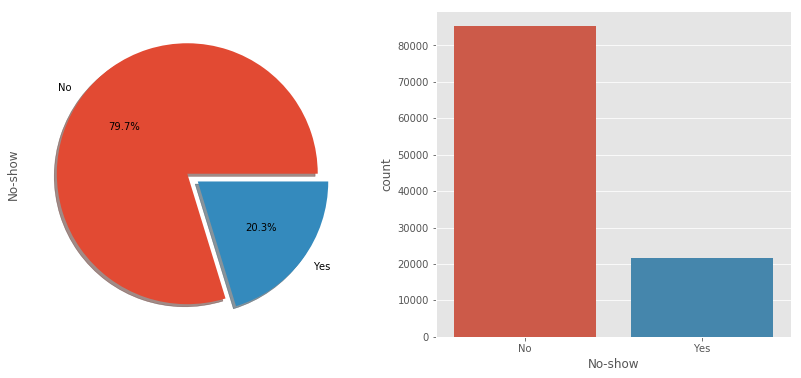

In [17]:
f, ax = plt.subplots(1, 2, figsize=(14,6))
df['No-show'].value_counts().plot.pie(explode=[0, 0.1], autopct='%1.1f%%', ax=ax[0], shadow=True)
ax[0].set_ylabel('No-show')
sns.countplot('No-show', data=df, ax=ax[1])
plt.show()

Out of 106,976 patients in training set, only around 21,677 did not show uo to their appointment. i.e 20.3% of the total patients did not show up to the appointment. 

### Effect of Gender on Missed Appointment

In [18]:
pd.crosstab(df['Gender'], df['No-show'], margins=True, margins_name='Total')

No-show,No,Yes,Total
Gender,,,
F,55837,14272,70109
M,29462,7405,36867
Total,85299,21677,106976


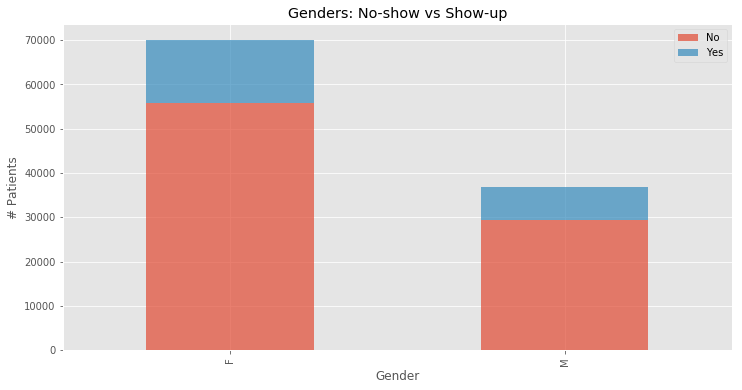

In [19]:
pgender = df.groupby(['Gender', 'No-show'])['No-show'].count().unstack()
pgender = pgender.plot(kind = 'bar', stacked = True, 
                   title = 'Genders: No-show vs Show-up', alpha = .70, figsize=(12,6))
pgender.set_xlabel('Gender')
pgender.set_ylabel('# Patients')
pgender.legend(['No', 'Yes'])
plt.show()

Demographically, the female patients are nearly 2 times of male patients.

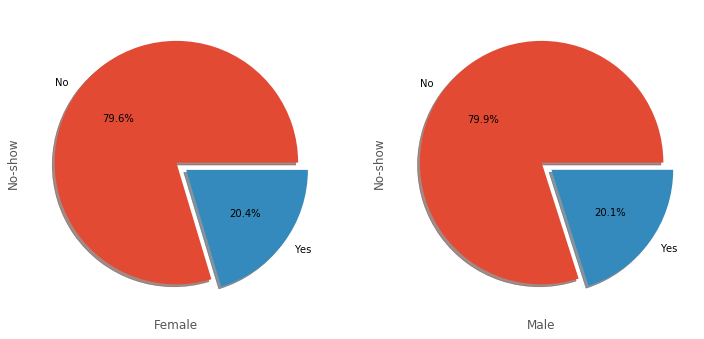

In [20]:
f, ax = plt.subplots(1, 2, figsize=(12,6))
df[df.Gender == 'F']['No-show'].value_counts().plot.pie(explode=[0, 0.1], autopct='%1.1f%%', ax=ax[0], shadow=True)
ax[0].set_ylabel('No-show')
ax[0].set_xlabel('Female')
df[df.Gender == 'M']['No-show'].value_counts().plot.pie(explode=[0, 0.1], autopct='%1.1f%%', ax=ax[1], shadow=True)
ax[1].set_xlabel('Male')
plt.show()

Although the female count is nearly 2 times of male count, No-show ratio is same. There is no relationship with gender and No-show attribute.

### Effect of Waiting Time on Missing Appointment

C:\Users\MONSTER\Anaconda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


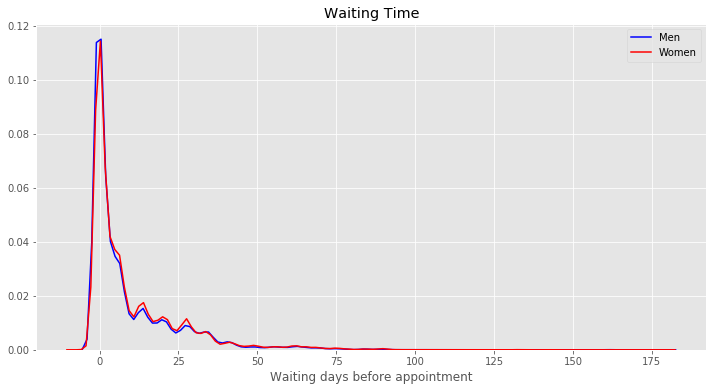

In [21]:
rcParams['figure.figsize'] = 12, 6
sns.kdeplot(df.WaitingTime[df.Gender == 'M'], color = 'b')
sns.kdeplot(df.WaitingTime[df.Gender == 'F'], color = 'r')
plt.title('Waiting Time')
plt.xlabel('Waiting days before appointment')
plt.legend(['Men', 'Women'])
plt.show()


Most visits are planned several days in advance. The patterns is pretty much identical for both men and women.

In [22]:
df['WaitingTimeBins'] = pd.cut(df['WaitingTime'], 7)
pd.crosstab(df['WaitingTimeBins'], df['No-show'], normalize='index').style.background_gradient(cmap='BuGn_r', axis=0)

No-show,No,Yes
WaitingTimeBins,,
"(-6.761, 19.871]",0.826447,0.173553
"(19.871, 46.319]",0.664256,0.335744
"(46.319, 72.766]",0.695143,0.304857
"(72.766, 99.213]",0.714044,0.285956
"(99.213, 125.66]",0.767857,0.232143
"(125.66, 152.108]",0.541667,0.458333
"(152.108, 178.555]",0.690909,0.309091


Although some intervals did not match the pattern, generally while the waiting time of appointment increases the no-show rate also increases. Intervals that has more than 100 days to appointment does not contain enough data, so for these intervals, it is not true to interpret the data.

### Effect of Chronic Conditions on Missing Appointment

In [23]:
pd.crosstab(df['Handicap'], df['No-show'], normalize='index').style.background_gradient(cmap='BuGn_r', axis=0)

No-show,No,Yes
Handicap,,
0,0.796901,0.203099
1,0.821622,0.178378
2,0.797814,0.202186
3,0.769231,0.230769
4,0.666667,0.333333


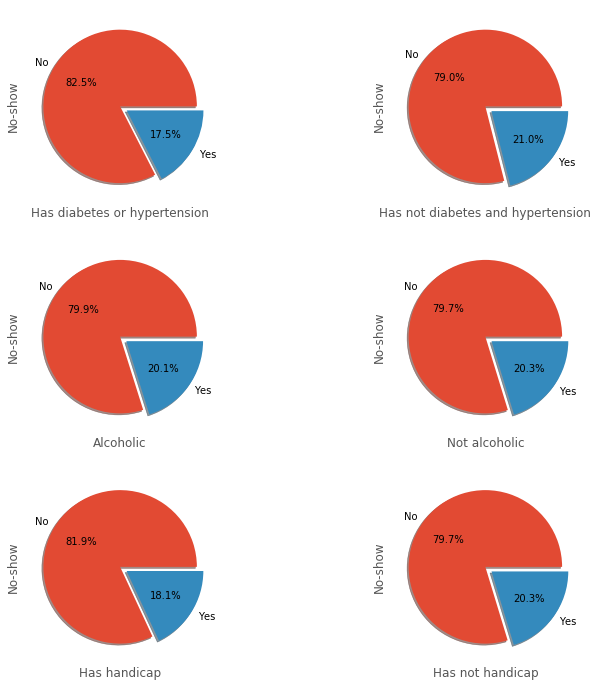

In [24]:
f, ax = plt.subplots(3, 2, figsize=(12,12))
df[(df.Hypertension == 1) | (df.Diabetes == 1)]['No-show'].value_counts().plot.pie(explode=[0, 0.1], autopct='%1.1f%%', ax=ax[0,0], shadow=True)
ax[0,0].set_ylabel('No-show')
ax[0,0].set_xlabel('Has diabetes or hypertension')

df[(df.Hypertension == 0) & (df.Diabetes == 0)]['No-show'].value_counts().plot.pie(explode=[0, 0.1], autopct='%1.1f%%', ax=ax[0,1], shadow=True)
ax[0,1].set_xlabel('Has not diabetes and hypertension')

df[(df.Alcoholism == 1)]['No-show'].value_counts().plot.pie(explode=[0, 0.1], autopct='%1.1f%%', ax=ax[1,0], shadow=True)
ax[1,0].set_ylabel('No-show')
ax[1,0].set_xlabel('Alcoholic')

df[(df.Alcoholism == 0)]['No-show'].value_counts().plot.pie(explode=[0, 0.1], autopct='%1.1f%%', ax=ax[1,1], shadow=True)
ax[1,1].set_xlabel('Not alcoholic')

df[~(df.Handicap == 0)]['No-show'].value_counts().plot.pie(explode=[0, 0.1], autopct='%1.1f%%', ax=ax[2,0], shadow=True)
ax[2,0].set_ylabel('No-show')
ax[2,0].set_xlabel('Has handicap')

df[(df.Handicap == 0)]['No-show'].value_counts().plot.pie(explode=[0, 0.1], autopct='%1.1f%%', ax=ax[2,1], shadow=True)
ax[2,1].set_xlabel('Has not handicap')

plt.show()


Patients who have diabetes or hypertension problems are less likely to miss their appointments than patients who did not have these problems. Also patients who has some handicap are more willing to keep their appointments when compare to patients who has not got any handicap and lastly people with alcohol problems are less likely to miss their appointments.


### Effect of Neighbourhood on Missing Appointment

C:\Users\MONSTER\Anaconda\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


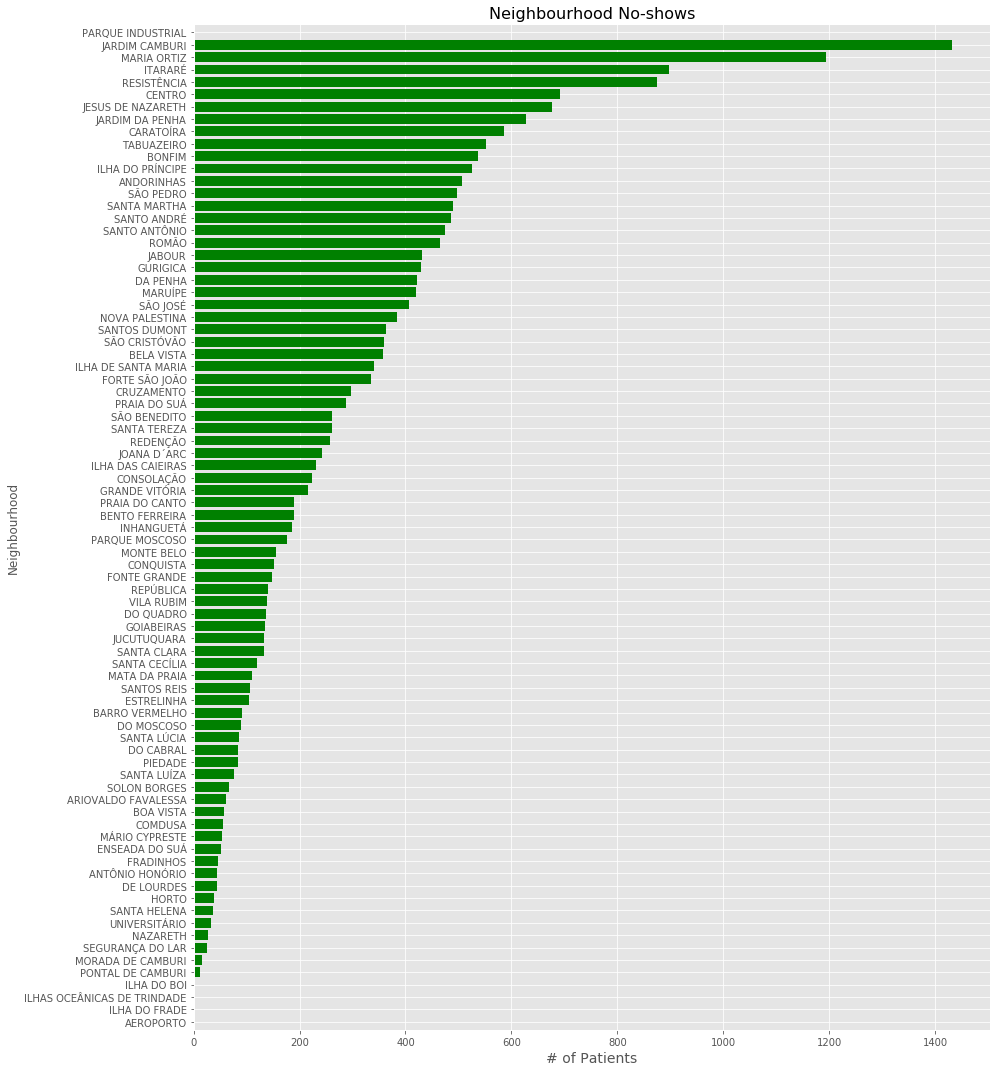

In [27]:
rcParams['figure.figsize'] = 14, 15
dfNeighbourhood = df[['Neighbourhood', 'No-show']]
encoder = LabelEncoder()
dfNeighbourhood['No-show'] = encoder.fit_transform(dfNeighbourhood['No-show'])
dfNeighbourhood = dfNeighbourhood.groupby(['Neighbourhood', 'No-show'])['No-show'].count().unstack().reset_index().rename_axis(None, axis=1)
dfNeighbourhood.set_index('Neighbourhood', inplace=True)
dfNeighbourhood = dfNeighbourhood.sort_values(1, ascending=True)
ax = dfNeighbourhood[1].plot.barh(width=0.8, color='g')
ax.set_xlabel('# of Patients', fontsize=14)
plt.title('Neighbourhood No-shows', fontsize=16)
plt.tight_layout()
plt.show()

The graph shows that patients who are from Jardim Camburi, Maria Ortiz, Itarare or Resistencia neighbourhoods are more likely to miss their appointments. 

### Transforming Data for Future Analysis

In [28]:
#  transform non-numerical labels to numerical labels.
encoder = LabelEncoder()
df['Gender'] = encoder.fit_transform(df['Gender'])
df['Neighbourhood'] = encoder.fit_transform(df['Neighbourhood'])
df['No-show'] = encoder.fit_transform(df['No-show'])

### Effect of Appointment Day of Week on Missing Appointment

C:\Users\MONSTER\Anaconda\lib\site-packages\pandas\core\indexes\base.py:3078: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return self._engine.get_loc(key)
C:\Users\MONSTER\Anaconda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


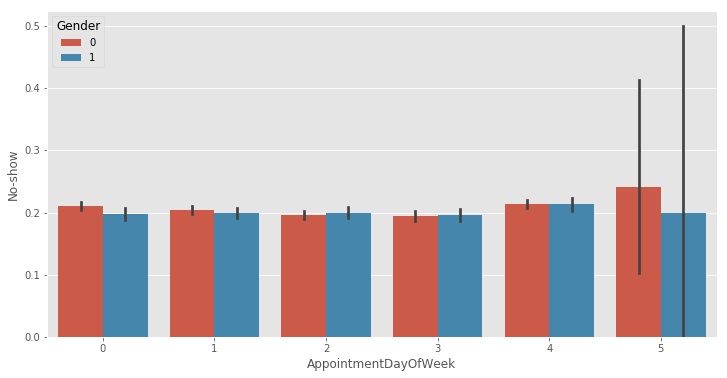

In [29]:
rcParams['figure.figsize'] = 12, 6
ax = sns.barplot(x="AppointmentDayOfWeek", y="No-show", hue='Gender', orient='v', data=df)

As we can see from the graph above, since the No-show rate looks a little bit higher in Friday and Saturday, there is no direct relationship between appoinment day of week and No-show attribute. Also women prefer to come to the appointment on Saturdays more than men. An explanation for why there's no data for Sundays could be that they may not give any appointment for Sundays.

### Effect of Age on Missing Appointment

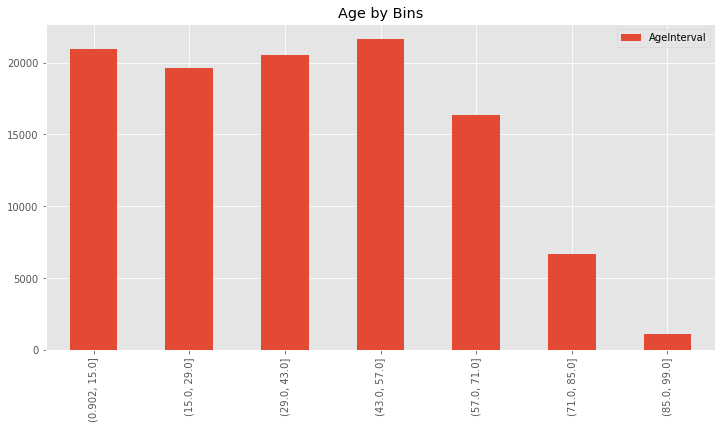

In [30]:
df['AgeInterval'] = pd.cut(df['Age'], 7)
dfBins = (df['AgeInterval'].value_counts(sort=False)).to_frame()
dfBins.plot(kind='bar', figsize=(12,6), title='Age by Bins')
plt.show()

In [31]:
#checking the number of patients in each band
pd.crosstab(df['AgeInterval'], df['No-show'], normalize='index').style.background_gradient(cmap='BuGn_r', axis=0)

No-show,0,1
AgeInterval,,
"(0.902, 15.0]",0.779779,0.220221
"(15.0, 29.0]",0.751909,0.248091
"(29.0, 43.0]",0.78169,0.21831
"(43.0, 57.0]",0.817118,0.182882
"(57.0, 71.0]",0.845924,0.154076
"(71.0, 85.0]",0.844894,0.155106
"(85.0, 99.0]",0.832898,0.167102


As age is getting older the no-show ratio is decreasing. The max no-show rate is in between 15-29 age interval. And the min no-show rate is in between 57-71 age interval.

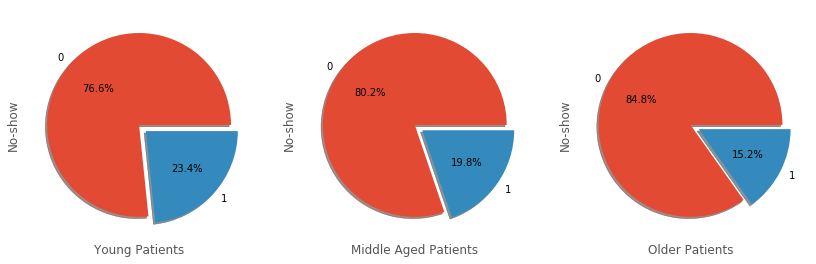

In [32]:
f, ax = plt.subplots(1, 3, figsize=(14,6))
df[df.Age < 30]['No-show'].value_counts().plot.pie(explode=[0, 0.1], autopct='%1.1f%%', ax=ax[0], shadow=True)
ax[0].set_ylabel('No-show')
ax[0].set_xlabel('Young Patients')

df[(df.Age >= 30) & (df.Age < 60)]['No-show'].value_counts().plot.pie(explode=[0, 0.1], autopct='%1.1f%%', ax=ax[1], shadow=True)
ax[1].set_xlabel('Middle Aged Patients')

df[df.Age > 60]['No-show'].value_counts().plot.pie(explode=[0, 0.1], autopct='%1.1f%%', ax=ax[2], shadow=True)
ax[2].set_xlabel('Older Patients')
plt.show()

When we divide the data in 3 section based on the age of patients, we can say that the elderly people are more willing to keep their appointments. And the young patients are the majority group (23.4%) who missed their appointments when compare to middle aged (19.8%) and old patients (15.2%).

C:\Users\MONSTER\Anaconda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


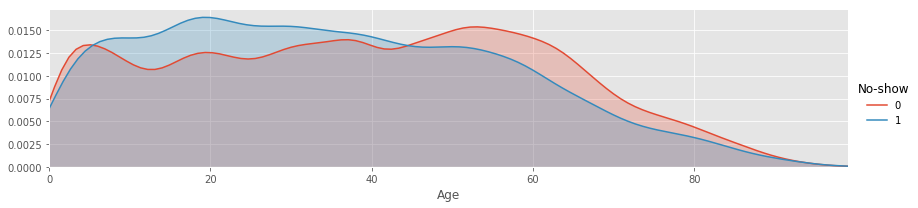

In [33]:
# plot distributions of age of patients who no-show or show
a = sns.FacetGrid(df, hue = 'No-show', aspect=4)
a.map(sns.kdeplot, 'Age', shade=True )
a.set(xlim=(0 , df['Age'].max()))
a.add_legend()
plt.show()

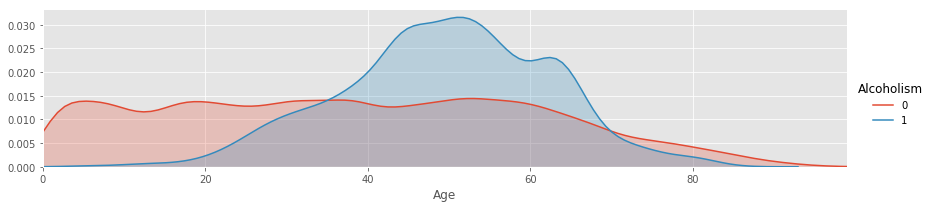

In [34]:
# plot distributions of age of patients who alcoholic or not
a = sns.FacetGrid(df, hue = 'Alcoholism', aspect=4)
a.map(sns.kdeplot, 'Age', shade=True )
a.set(xlim=(0 , df['Age'].max()))
a.add_legend()
plt.show()

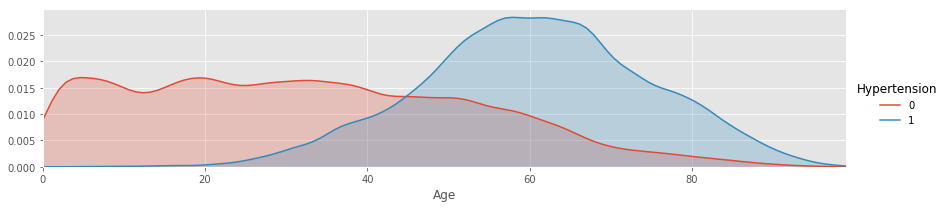

In [35]:
# plot distributions of age of patients who has hipertension or not
a = sns.FacetGrid(df, hue = 'Hypertension', aspect=4)
a.map(sns.kdeplot, 'Age', shade=True )
a.set(xlim=(0 , df['Age'].max()))
a.add_legend()
plt.show()

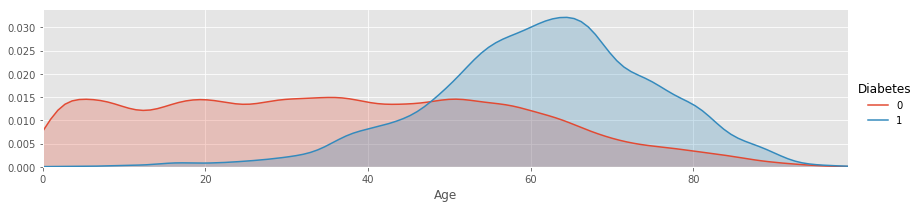

In [36]:
# plot distributions of age of patients who has diabetes or not
a = sns.FacetGrid(df, hue = 'Diabetes', aspect=4)
a.map(sns.kdeplot, 'Age', shade=True )
a.set(xlim=(0 , df['Age'].max()))
a.add_legend()
plt.show()

### Effect of SMS Remainder on Missing Appointment

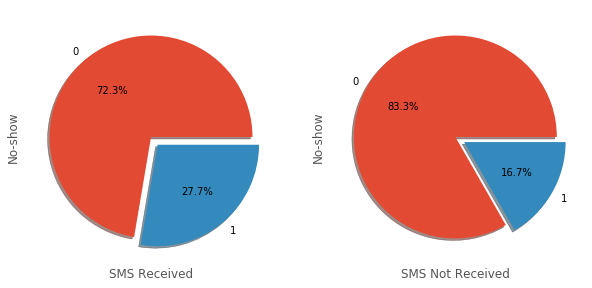

In [37]:
f, ax = plt.subplots(1, 2, figsize=(10,6))
df[df.SMS_received == 1]['No-show'].value_counts().plot.pie(explode=[0, 0.1], autopct='%1.1f%%', ax=ax[0], shadow=True)
ax[0].set_ylabel('No-show')
ax[0].set_xlabel('SMS Received')

df[df.SMS_received == 0]['No-show'].value_counts().plot.pie(explode=[0, 0.1], autopct='%1.1f%%', ax=ax[1], shadow=True)
ax[1].set_xlabel('SMS Not Received')
plt.show()

The result is surprising, as the graph shows patients who did receive SMS remainder are more likely to miss their appointment (27.7%) than those who did (16.7%).

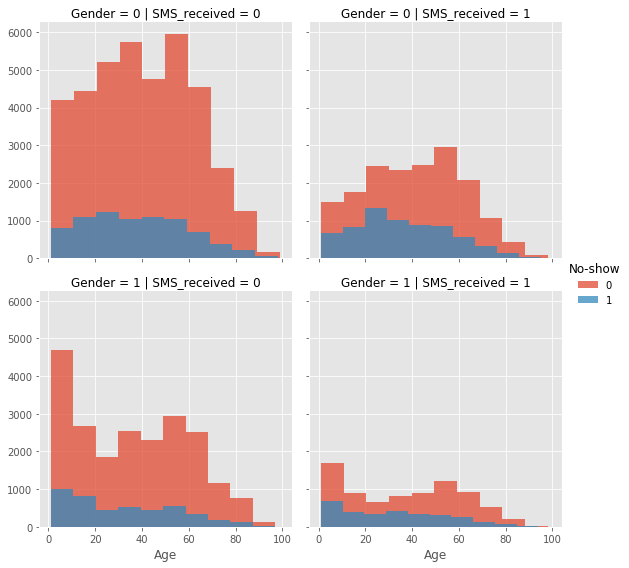

In [38]:
# histogram comparison of Gender, SMS_received, and Age by No-show
h = sns.FacetGrid(df, row = 'Gender', col = 'SMS_received', hue = 'No-show', height=4)
h.map(plt.hist, 'Age', alpha = .75, bins=10)
h.add_legend()
plt.show()

### Effect of ScholarShip on Missing Appointment

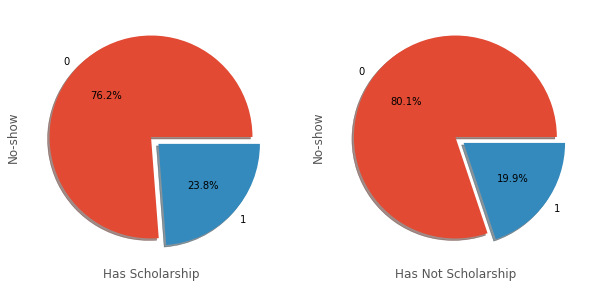

In [39]:
f, ax = plt.subplots(1, 2, figsize=(10,6))
df[df.Scholarship == 1]['No-show'].value_counts().plot.pie(explode=[0, 0.1], autopct='%1.1f%%', ax=ax[0], shadow=True)
ax[0].set_ylabel('No-show')
ax[0].set_xlabel('Has Scholarship')

df[df.Scholarship == 0]['No-show'].value_counts().plot.pie(explode=[0, 0.1], autopct='%1.1f%%', ax=ax[1], shadow=True)
ax[1].set_xlabel('Has Not Scholarship')
plt.show()

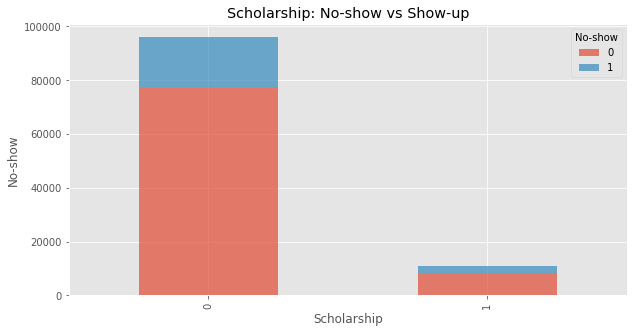

In [40]:
pscholarship = df.groupby(['Scholarship', 'No-show'])['No-show'].count().unstack()
pscholarship = pscholarship.plot(kind = 'bar', stacked = True, 
                   title = 'Scholarship: No-show vs Show-up', alpha = .70, figsize=(10,5))
pscholarship.set_xlabel('Scholarship')
pscholarship.set_ylabel('No-show')
plt.show()


As it is seen from above graphs patients who have scholarship are more likely to miss their appointments.

### Analysis of All Features on Missing Appointments

C:\Users\MONSTER\Anaconda\lib\site-packages\pandas\core\indexes\base.py:3078: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return self._engine.get_loc(key)


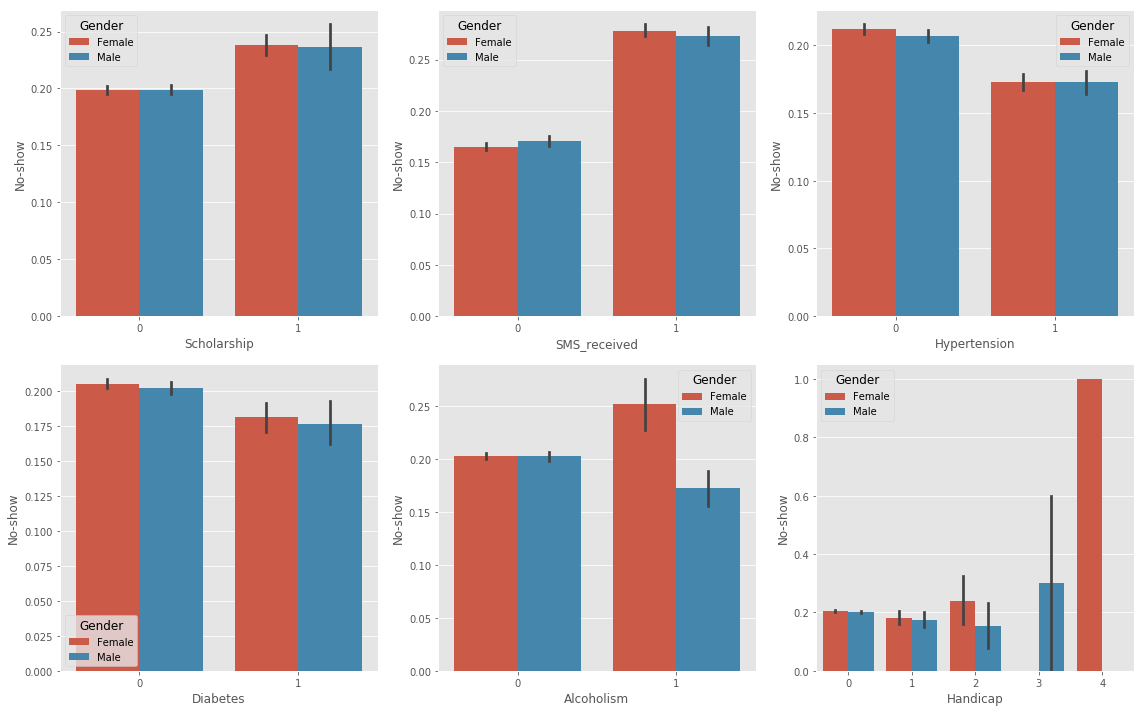

In [41]:
fig, saxis = plt.subplots(2, 3, figsize=(16,10), squeeze=False)
dfCopy = df.copy()
dfCopy['Gender'] = np.where(dfCopy['Gender']==0, 'Female', 'Male')
sns.barplot(x = 'Scholarship', y = 'No-show', hue='Gender', orient='v', data=dfCopy, ax = saxis[0,0])
sns.barplot(x = 'SMS_received', y = 'No-show', hue='Gender', orient='v', data=dfCopy, ax = saxis[0,1])
sns.barplot(x = 'Hypertension', y = 'No-show', hue='Gender', orient='v', data=dfCopy, ax = saxis[0,2])
sns.barplot(x = 'Diabetes', y = 'No-show', hue='Gender', orient='v', data=dfCopy, ax = saxis[1,0])
sns.barplot(x = 'Alcoholism', y = 'No-show', hue='Gender', orient='v',data=dfCopy, ax = saxis[1,1])
sns.barplot(x = 'Handicap', y = 'No-show', hue='Gender', orient='v', data=dfCopy, ax = saxis[1,2])
plt.tight_layout()    
plt.show()


From the above graphs, it can be seen that the patients who has scholarship are more prone to no-show than patients who has not. If a reminder SMS is received by the patient, s/he is more likely to no-show. Also if the patient has diabetes or hypertension, s/he is more likely show up. 

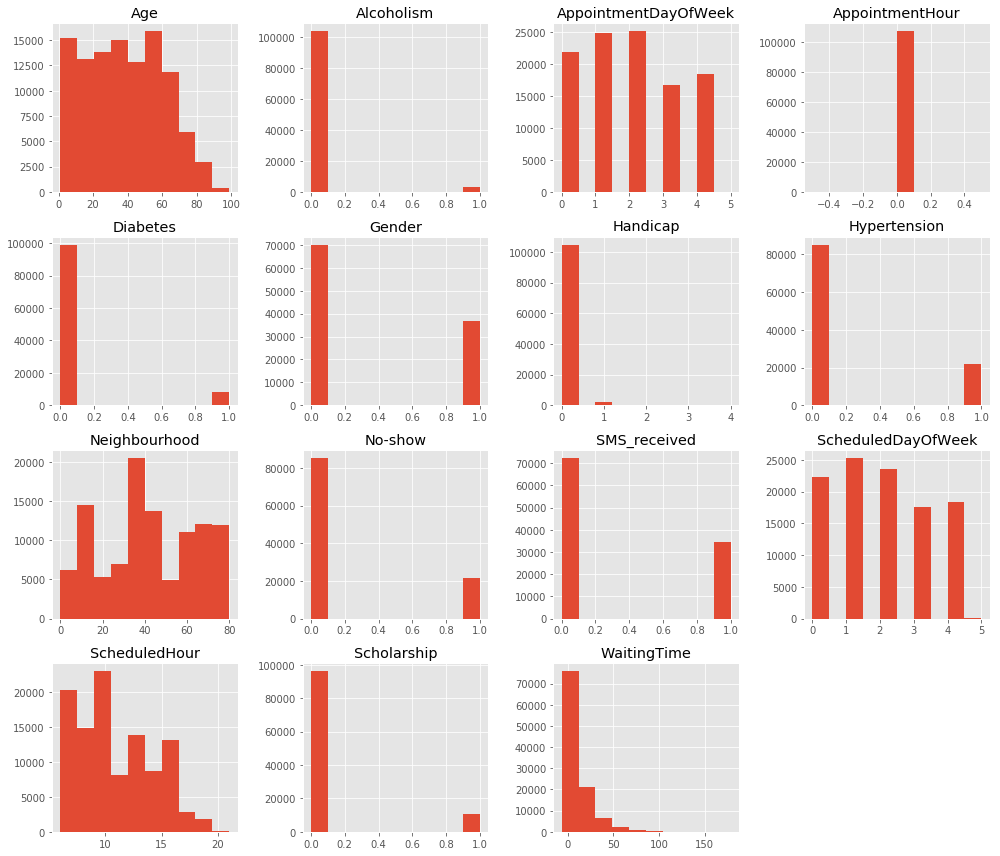

In [42]:
# histograms 
df.hist(figsize=(14,12))
plt.tight_layout()
plt.show()

### Box Plots on Features

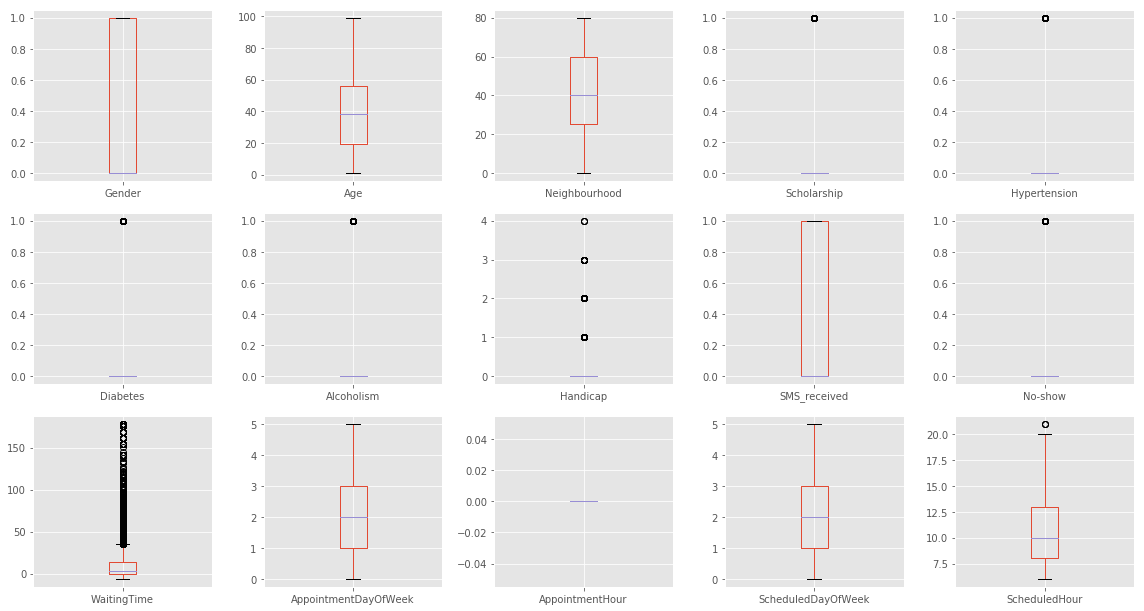

In [43]:
# box and whisker plots
df.plot(kind='box', subplots=True, layout=(5,5), figsize=(16,14), sharex=False, sharey=False)
plt.tight_layout()
plt.show()


### Feature Correlation

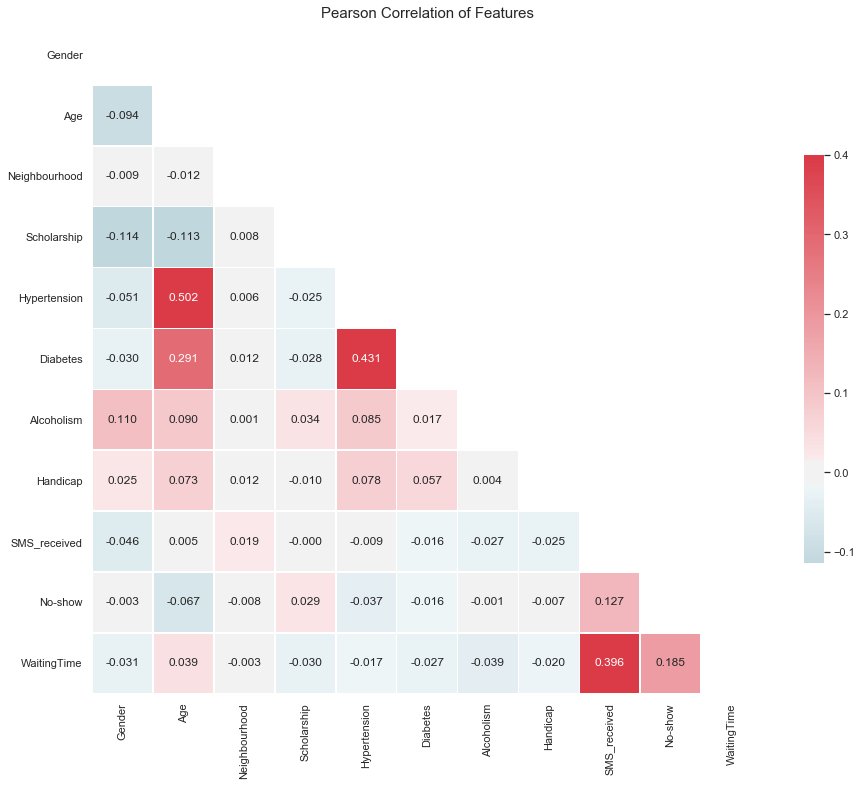

In [44]:
sns.set(style="white")
f, ax = plt.subplots(figsize=(15, 15))
df.drop(['AppointmentDayOfWeek', 'AppointmentHour', 'ScheduledDayOfWeek'
         , 'ScheduledHour', 'AgeInterval', 'WaitingTimeBins'], axis=1, inplace=True)
corr = df.corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(corr, cmap=cmap, vmax=.4, center=0,
            square=True, linewidths=.6, mask=mask, annot=True, fmt=".3f", cbar_kws={"shrink": .5})
plt.title('Pearson Correlation of Features', y=1.05, size=15)
plt.show()

Now from the above heatmap, although we can see that the features are not much correlated, we can see some positively related features like Age-Hipertension, Age-Diabetes, Diabetes-Hipertension and SMS_received-Waiting Time and some negative correlated features like Age-Scholarship. The highest positive correlation is between Age and Hipertension i.e 0.502. So we can drop one of the features that Diabetes or Hipertension. So we can select anyone of them randomly (Diabetes or Hipertension), as both of them contain almost the same info. We can either check the feature importance graph and make a decision of which feature to keep. 

### Feature Importance

C:\Users\MONSTER\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


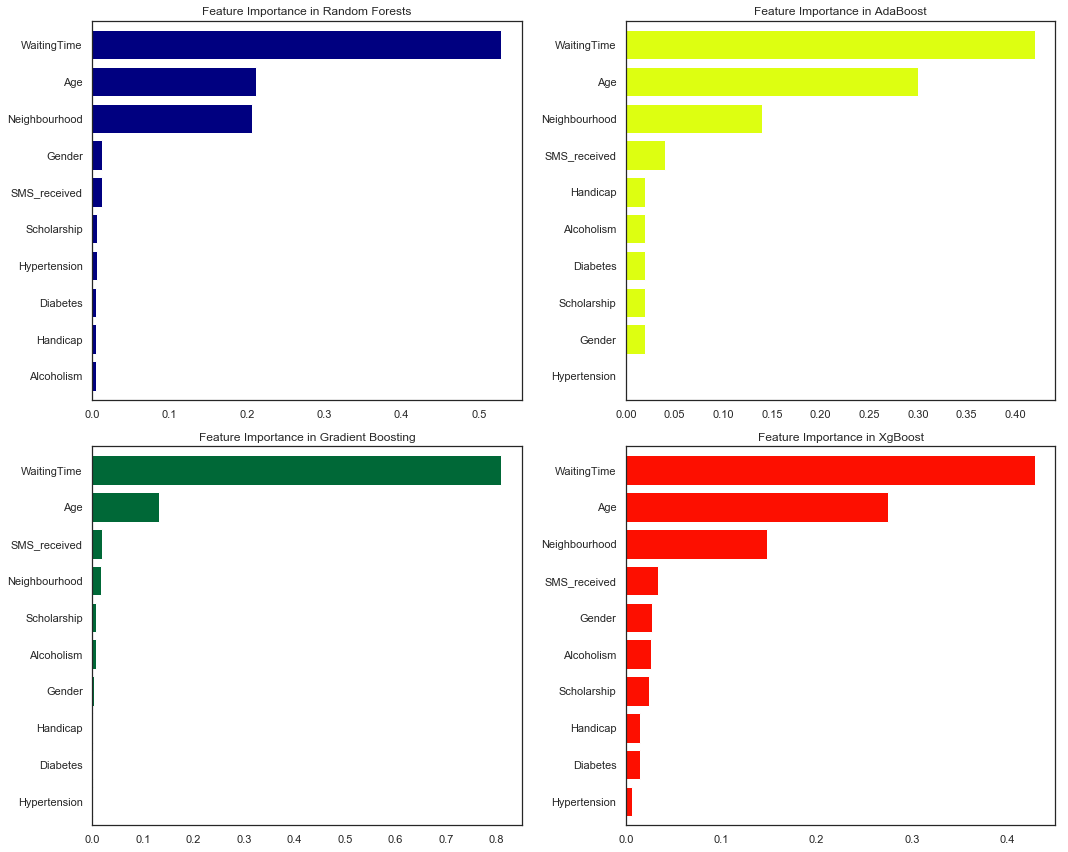

In [45]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xg

x_train = df.copy()
y_train = x_train.pop('No-show')

f,ax=plt.subplots(2,2,figsize=(15,12))
model=RandomForestClassifier()
model.fit(x_train,y_train)
pd.Series(model.feature_importances_,x_train.columns).sort_values(ascending=True).plot.barh(width=0.8,ax=ax[0,0], color='navy')
ax[0,0].set_title('Feature Importance in Random Forests')

model=AdaBoostClassifier()
model.fit(x_train,y_train)
pd.Series(model.feature_importances_,x_train.columns).sort_values(ascending=True).plot.barh(width=0.8,ax=ax[0,1],color='#ddff11')
ax[0,1].set_title('Feature Importance in AdaBoost')

model=GradientBoostingClassifier()
model.fit(x_train,y_train)
pd.Series(model.feature_importances_,x_train.columns).sort_values(ascending=True).plot.barh(width=0.8,ax=ax[1,0],cmap='RdYlGn_r')
ax[1,0].set_title('Feature Importance in Gradient Boosting')

model=xg.XGBClassifier()
model.fit(x_train,y_train)
pd.Series(model.feature_importances_,x_train.columns).sort_values(ascending=True).plot.barh(width=0.8,ax=ax[1,1],color='#FD0F00')
ax[1,1].set_title('Feature Importance in XgBoost')

plt.tight_layout()
plt.show()



We can see the feature importance for various classifiers like RandomForests, AdaBoost,etc.

- Some of the common important features are Age, WaitingTime, Neighbourhood and SMS_received.

- The Alcoholism feature seems to important based on the classifiers other than Random Forest.

- The features Diabetes, Hypertension and Handicap may be dropped based on these graphs.